<a href="https://colab.research.google.com/github/bk191/Python_Projects/blob/main/Movies_CSV_Investigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Statements

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


# Notebook Presentation

In [2]:


from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

# Read the Data

In [4]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

An investigation and cleaning of the data set.

In [5]:
print(f"There are {data.shape[0]} rows in the dataset.")

There are 5391 rows in the dataset.


In [6]:
print(f"There are {data.shape[1]} columns in the dataset.")

There are 6 columns in the dataset.


In [7]:
#Check for duplicate rows
data.duplicated().value_counts()

False    5391
dtype: int64

In [8]:
#Check of data types in dataframe
data.dtypes

Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object

### Data Type Conversions

Conversion of columns containing numbers from strings to numeric type.

In [9]:
#Removing "$" and "," and converting to numeric format
data.USD_Production_Budget = data["USD_Production_Budget"].str.replace("$", "")
data.USD_Production_Budget = data["USD_Production_Budget"].str.replace(",", "")
data.USD_Production_Budget = pd.to_numeric(data.USD_Production_Budget)

data.USD_Domestic_Gross = data["USD_Domestic_Gross"].str.replace("$", "")
data.USD_Domestic_Gross = data["USD_Domestic_Gross"].str.replace(",", "")
data.USD_Domestic_Gross = pd.to_numeric(data.USD_Domestic_Gross)

data.USD_Worldwide_Gross = data["USD_Worldwide_Gross"].str.replace("$", "")
data.USD_Worldwide_Gross = data["USD_Worldwide_Gross"].str.replace(",", "")
data.USD_Worldwide_Gross = pd.to_numeric(data.USD_Worldwide_Gross)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  # Remove the CWD from sys.path while we load stuff.


In [10]:
data.dtypes

Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget     int64
USD_Worldwide_Gross       int64
USD_Domestic_Gross        int64
dtype: object

In [11]:
data.USD_Production_Budget

0          110000
1          385907
2          200000
3          100000
4          245000
          ...    
5386     15000000
5387    160000000
5388    175000000
5389     50000000
5390     20000000
Name: USD_Production_Budget, Length: 5391, dtype: int64

Conversion of the "Release_Date" column to datetime data type.

In [12]:
#Converting the "Release_Date" column to Datetime type
data.Release_Date = pd.to_datetime(data.Release_Date)

In [13]:
data.dtypes

Rank                              int64
Release_Date             datetime64[ns]
Movie_Title                      object
USD_Production_Budget             int64
USD_Worldwide_Gross               int64
USD_Domestic_Gross                int64
dtype: object

### Descriptive Statistics

Investigation of different descriptive statistics

In [14]:
#Finding the average production budget.
print(f"The average production budget is: ${data.USD_Production_Budget.mean()}")

The average production budget is: $31113737.57837136


In [15]:
#Finding the average worldwide gross revenue of films
print(f"The average wordwide gross of films is: ${data.USD_Worldwide_Gross.mean()}")

The average wordwide gross of films is: $88855421.96271564


In [16]:
#Finding the minimum worldwide and domestic revenue
print(f"The minimum domestic revenue of a film is: ${data.USD_Domestic_Gross.min()}")
print(f"The mnimum worldwide revenue of a film is: ${data.USD_Domestic_Gross.min()}")

The minimum domestic revenue of a film is: $0
The mnimum worldwide revenue of a film is: $0


In [17]:
#Finding the highest production budget and highest worldwide gross revenue
print(f"The largest budget of any film is: ${data.USD_Production_Budget.max()}")
print(f"The highest worldwide gross is: ${data.USD_Worldwide_Gross.max()}")

The largest budget of any film is: $425000000
The highest worldwide gross is: $2783918982


In [18]:
#Finding the worldwide revenue of the highest budget movie
data[data["USD_Production_Budget"] == data.USD_Production_Budget.max()]["USD_Worldwide_Gross"]

3529    2783918982
Name: USD_Worldwide_Gross, dtype: int64

In [19]:
#Finding the worldwide revenue of the movie with the lowest budget
data[data["USD_Production_Budget"] == data.USD_Production_Budget.min()]["USD_Worldwide_Gross"]

2427    181041
Name: USD_Worldwide_Gross, dtype: int64

# Investigating the Zero Revenue Films

Looking further into films with no revenue.

In [20]:
#Finding how many movies grossed $0 domestically
print(f"There are {data[data['USD_Domestic_Gross'] == 0].shape[0]} movies that grossed $0 domestically")

There are 512 movies that grossed $0 domestically


In [21]:
#Finding the highest budget film that grossed $0
max_budget_zero = data[data["USD_Domestic_Gross"] == 0]["USD_Production_Budget"].max()
data[(data["USD_Domestic_Gross"] == 0) & (data["USD_Production_Budget"] == max_budget_zero)]["Movie_Title"]

5388    Singularity
Name: Movie_Title, dtype: object

In [22]:
#Finding the number of films that grossed $0 worldwide
print(f"The are {data[data['USD_Worldwide_Gross'] == 0].shape[0]} films that grossed $0 worldwide")

The are 357 films that grossed $0 worldwide


In [23]:
data.shape[0]

5391

The data was scraped on 1/5/2018. In section we will drop columns associated with films made on or after this date.

In [24]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [25]:
# Dataframe of films prior to date of data collection
data[data["Release_Date"] < scrape_date]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343


In [26]:
#Dropping rows containing films with a release date on or after the date of data collection
data.drop(data[data["Release_Date"] >= scrape_date].index, inplace=True)

Investigating films that lost money. 

In [27]:
budget_exceed_rev = data.query("USD_Production_Budget > USD_Worldwide_Gross")

In [28]:
print(f"The percentage of films where the production costs were greater than the worldwide gross revenue is {budget_exceed_rev.shape[0] *100/data.shape[0]}%")

The percentage of films where the production costs were greater than the worldwide gross revenue is 37.27711738484398%


Using seaborn the create visualisations.

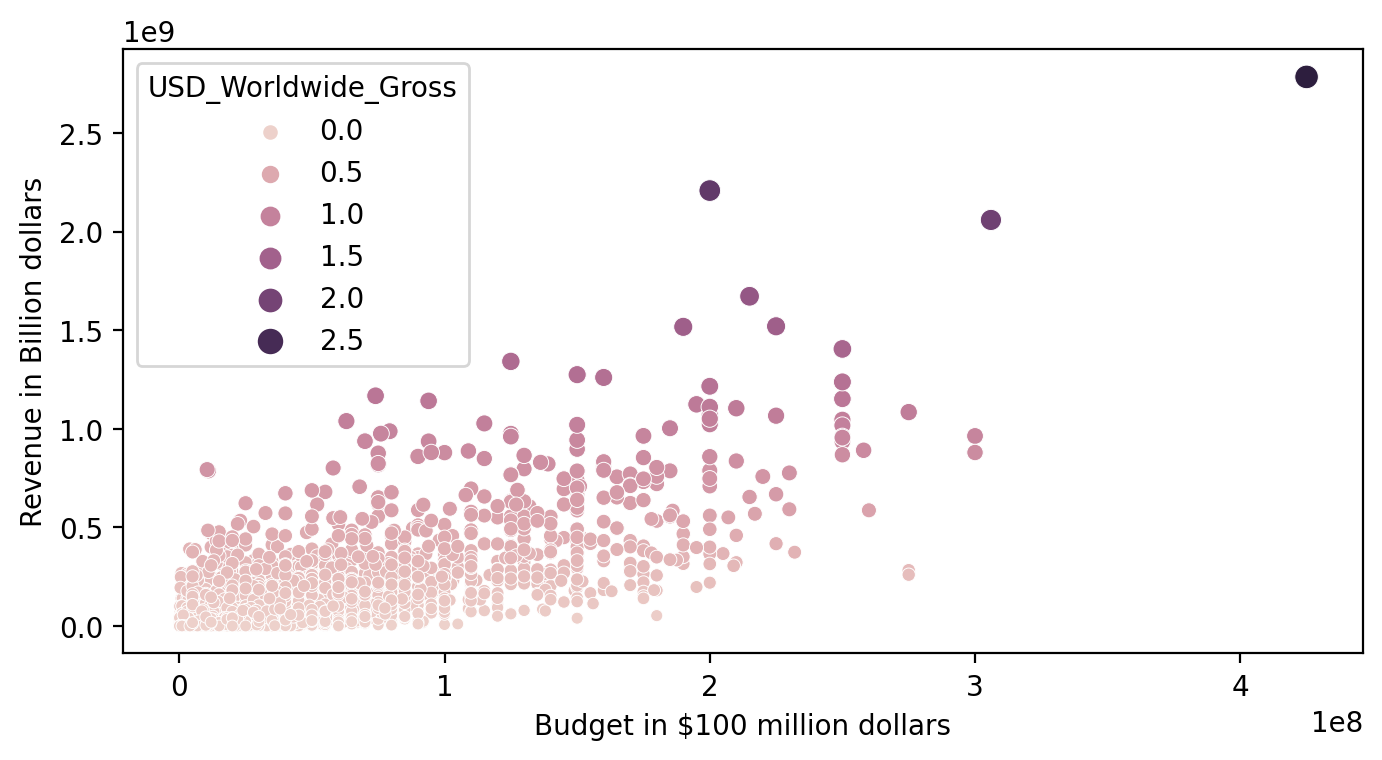

In [29]:
plt.figure(figsize=(8, 4), dpi=200)
ax = sns.scatterplot(data=data, x="USD_Production_Budget",
                y="USD_Worldwide_Gross",
                hue="USD_Worldwide_Gross",
                size="USD_Worldwide_Gross")
ax.set(# xlim=(0, 4500000000),
       # ylim=(0, 300000000),
       xlabel="Budget in $100 million dollars",
       ylabel="Revenue in Billion dollars")

plt.show()

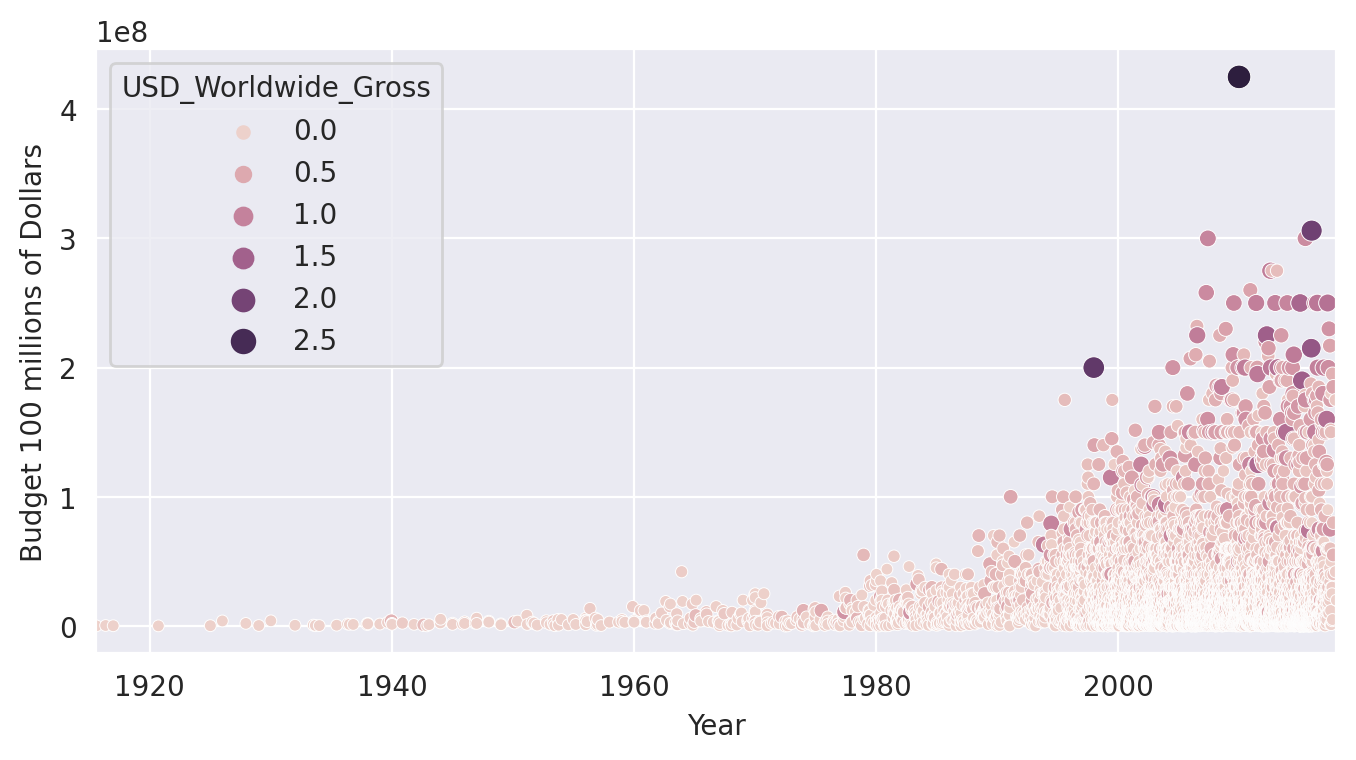

In [30]:
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style("darkgrid"):
  ax1 = sns.scatterplot(data=data, x="Release_Date",
                      y="USD_Production_Budget",
                      hue="USD_Worldwide_Gross",
                      size="USD_Worldwide_Gross"
                      )
ax1.set(xlabel="Year",
        ylabel="Budget 100 millions of Dollars",
        xlim=(data.Release_Date.min(), data.Release_Date.max()))

plt.show()



Separating the films into two categories. "Old films" are classed as films made before 1970. "New films" are classed as films made on or after 1970.

In [34]:
#Creating two new dataframes
old_films = data.query("Release_Date <= 1969")
new_films = data.query("Release_Date > 1970")

In [35]:
#Finding the number of films made before 1970
print(f"The number of films made before 1970 is {old_films.shape[0]}")

The number of films made before 1970 is 144


Using seaborn to create regression plots.

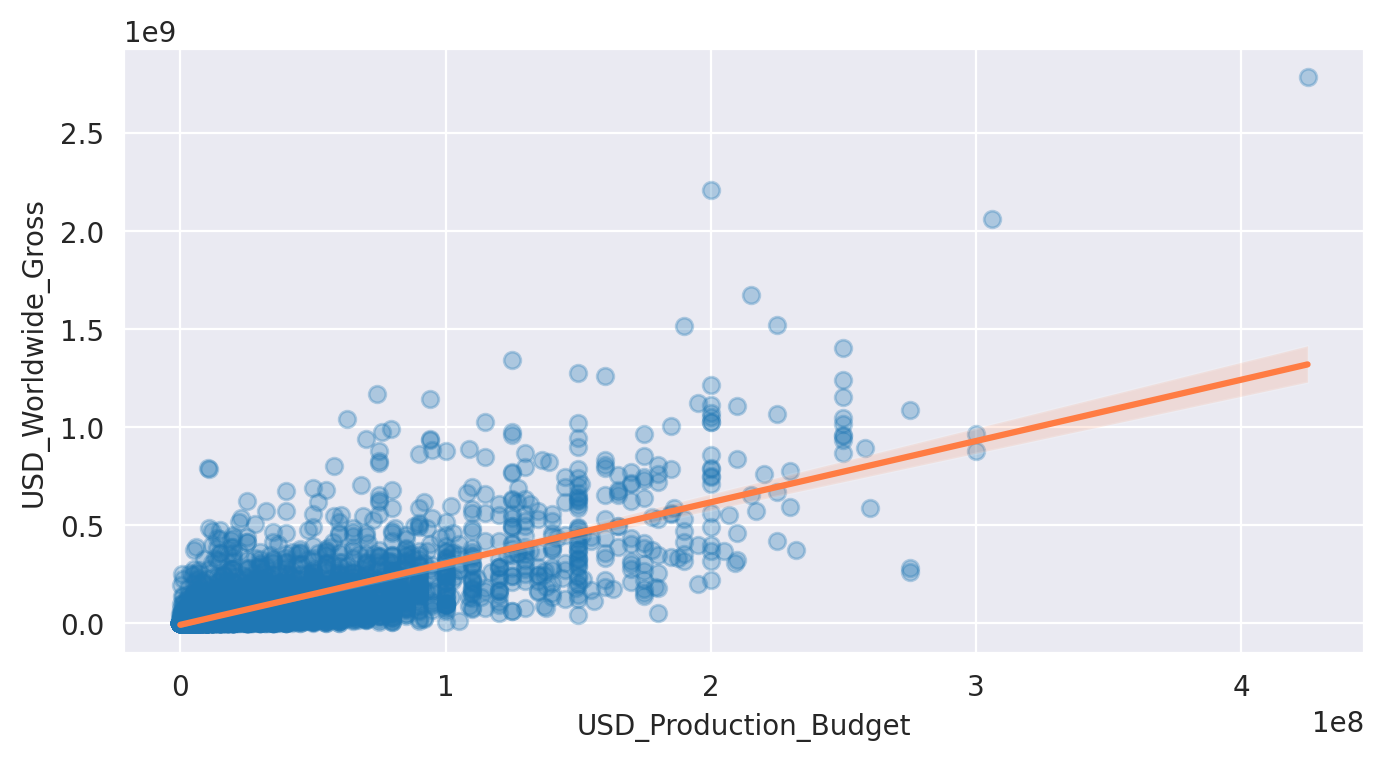

In [52]:
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style("darkgrid"):
  ax = sns.regplot(data=new_films,
              x="USD_Production_Budget",
              y="USD_Worldwide_Gross",
              scatter_kws={"alpha": 0.3},
              line_kws={"color": "#ff7c43"}
              
  )


Using scikitlearn to create a linear regression

In [54]:
regression = LinearRegression()

In [55]:
#Creating dataframes to be input into ther regression
x = pd.DataFrame(old_films, columns=["USD_Production_Budget"])
y= pd.DataFrame(old_films, columns=["USD_Worldwide_Gross"])

In [56]:
regression.fit(x, y)

LinearRegression()

In [58]:
#Finding the y intercept, coefficient, and goodness of fit of the regression
regression.intercept_


0.03185200742352845

In [59]:
#Finding the coefficent of the regression
regression.coef_

array([[1.82164944]])

In [60]:
#Finding the goodness of fit of the regression
regression.score(x, y)

0.03185200742352845